In [ ]:
# Import 3rd party dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

!pip install imblearn

from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import roc_auc_score, cohen_kappa_score
from sklearn.metrics import (
    balanced_accuracy_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
)
from imblearn.over_sampling import SMOTE
from torch.autograd.functional import hessian
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    cohen_kappa_score,
    confusion_matrix,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import warnings
from IPython.display import display, HTML

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from google.colab import files
import pickle

In [ ]:
# Suppressing Warnings and Adjusting Display Width
# We ignore any warning messages that might arise during execution to maintain clean output.
# Additionally, we adjust the display width to ensure that the content is fully visible within the Jupyter notebook.

warnings.filterwarnings("ignore")
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load the data, exploratory data analysis, and data splitting

In this demo we will use a preprocessed version of Heart Disease dataset.

In [ ]:
# Load the train data
# https://drive.google.com/file/d/1NhdrxyO-cS-44JDDnidFtWJtn-AVKVxA/view?usp=sharing
!wget -O "retina_training_set.csv" "https://drive.google.com/uc?export=download&id=1NhdrxyO-cS-44JDDnidFtWJtn-AVKVxA"
train_df = pd.read_csv("retina_training_set.csv")

--2024-08-22 17:13:21--  https://drive.google.com/uc?export=download&id=1NhdrxyO-cS-44JDDnidFtWJtn-AVKVxA
Resolving drive.google.com (drive.google.com)... 74.125.199.113, 74.125.199.138, 74.125.199.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.199.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1NhdrxyO-cS-44JDDnidFtWJtn-AVKVxA&export=download [following]
--2024-08-22 17:13:21--  https://drive.usercontent.google.com/download?id=1NhdrxyO-cS-44JDDnidFtWJtn-AVKVxA&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2265367 (2.2M) [application/octet-stream]
Saving to: ‘retina_training_set.csv’

retina_training_set 100%[===================>]   2.16M 

In [ ]:
# Load the test data

#https://drive.google.com/file/d/1EoPqPHm6GGMv2idzCUUYEk6NYYh93-4j/view?usp=sharing

!wget -O "retina_test_set.csv" "https://drive.google.com/uc?export=download&id=1EoPqPHm6GGMv2idzCUUYEk6NYYh93-4j"
test_df = pd.read_csv("retina_test_set.csv")

--2024-08-22 17:13:24--  https://drive.google.com/uc?export=download&id=1EoPqPHm6GGMv2idzCUUYEk6NYYh93-4j
Resolving drive.google.com (drive.google.com)... 74.125.199.113, 74.125.199.138, 74.125.199.139, ...
Connecting to drive.google.com (drive.google.com)|74.125.199.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1EoPqPHm6GGMv2idzCUUYEk6NYYh93-4j&export=download [following]
--2024-08-22 17:13:24--  https://drive.usercontent.google.com/download?id=1EoPqPHm6GGMv2idzCUUYEk6NYYh93-4j&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.197.132, 2607:f8b0:400e:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2377043 (2.3M) [application/octet-stream]
Saving to: ‘retina_test_set.csv’

retina_test_set.csv 100%[===================>]   2.27M  --.

In [ ]:
# Print the data table
train_df

,value__sum_values,value__median,value__variation_coefficient,value__count_above_mean,value__sample_entropy,value__minimum,value__c3__lag_1,value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,...,"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","value__fft_coefficient__attr_""abs""__coeff_0",value__approximate_entropy__m_2__r_0.5,value__approximate_entropy__m_2__r_0.7,"value__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","value__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""min""","value__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""min""",value__ratio_beyond_r_sigma__r_0.5,target
0,-0.956703,-0.653420,-0.134228,0.078276,0.383388,-0.698969,-0.755267,-0.775318,-0.756260,-0.757403,...,-0.592394,-0.758952,-0.956703,0.200028,0.002305,-0.765894,-0.760315,-0.813057,0.551313,0.0
1,-0.599208,-0.290729,0.077991,0.385055,0.303390,-0.715769,-0.193754,-0.787733,-0.779852,-0.725906,...,-0.333559,-0.600222,-0.599208,-0.543628,-0.971634,-0.497692,-0.773408,-0.845828,-0.150974,0.0
2,-0.824122,-0.424594,-0.362842,0.875902,0.598110,-0.703169,-0.719003,-0.778527,-0.747368,-0.746817,...,-0.455186,-0.694741,-0.824122,0.752088,0.846198,-0.765589,-0.764015,-0.829372,0.751967,0.0
3,-0.835847,-0.571631,-0.177651,0.569123,0.602638,-0.707369,-0.752630,-0.783827,-0.770960,-0.788056,...,-0.470593,-0.659325,-0.835847,0.471313,0.671270,-0.778780,-0.767715,-0.856403,0.751967,0.0
4,-0.904004,-0.514654,-0.280877,0.569123,0.825554,-0.715769,-0.761079,-0.783688,-0.772412,-0.772535,...,-0.609495,-0.752596,-0.904004,1.072091,0.749116,-0.769248,-0.775401,-0.843308,0.618198,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3797,-1.068992,-0.520780,-1.596234,0.998614,1.409009,1.287649,-0.772018,0.607329,0.301569,0.045153,...,-1.029825,-0.877530,-1.068992,1.108868,1.084745,0.596499,1.171230,1.204577,-0.184416,1.0
3798,1.974451,-0.119339,1.093701,-0.167147,-0.372118,-0.077363,1.701630,-0.288351,-0.350296,-0.400675,...,1.965832,1.777299,1.974451,-0.997376,-1.447472,-0.325116,-0.343607,-0.766877,-1.789644,1.0
3799,-0.446955,-0.639635,1.142741,-1.885110,-1.566315,0.468642,-0.680936,0.097345,-0.122906,-0.300924,...,-0.966568,-0.866192,-0.446955,-1.383998,-1.135153,0.029689,0.148530,-0.125140,-1.856528,1.0
3800,-0.507040,0.429446,-1.561980,1.673528,1.490186,2.633761,-0.570527,2.435934,1.897479,1.415824,...,-0.842666,-0.850215,-0.507040,1.469834,1.706131,2.266829,2.591283,2.486256,0.083122,1.0


In [ ]:
test_df

,value__sum_values,value__median,value__variation_coefficient,value__count_above_mean,value__sample_entropy,value__minimum,value__c3__lag_1,value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,...,"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","value__fft_coefficient__attr_""abs""__coeff_0",value__approximate_entropy__m_2__r_0.5,value__approximate_entropy__m_2__r_0.7,"value__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","value__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""min""","value__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""min""",value__ratio_beyond_r_sigma__r_0.5,target
0,1.974451,2.044631,0.577040,0.200988,-0.795497,-0.627568,1.701630,-0.758440,-0.778219,-0.836633,...,1.965832,1.777299,1.974451,-0.917556,-1.202062,-0.755203,-0.703388,-0.846944,0.283775,1.0
1,1.974451,2.044631,0.710549,-0.167147,-0.752142,-0.623368,0.604386,-0.745885,-0.770779,-0.830788,...,1.965832,1.777299,1.974451,-1.261081,-1.751251,-0.727989,-0.673785,-0.787596,-0.184416,1.0
2,1.974451,2.044631,0.345412,0.200988,-0.016448,-0.598168,1.701630,-0.747280,-0.770779,-0.821046,...,1.965832,1.777299,1.974451,-0.682095,-1.120580,-0.745366,-0.689156,-0.837684,-0.552281,1.0
3,1.974451,2.044631,-0.053509,0.200988,0.233614,-0.598168,1.701630,-0.745885,-0.766242,-0.818449,...,1.965832,1.777299,1.974451,0.000328,-0.263294,-0.741586,-0.690864,-0.835253,-0.217858,1.0
4,1.851683,2.044631,-0.445679,0.446411,0.681544,-0.598168,1.701630,-0.730541,-0.521974,2.337793,...,1.498842,1.777299,1.851683,0.219717,-0.095223,-0.570169,-0.691717,-0.778070,-0.184416,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,-0.488357,-0.370374,-0.049054,0.385055,0.168029,-0.472167,-0.641371,-0.587004,-0.562806,-0.592645,...,-0.090912,-0.454834,-0.488357,0.136938,0.233840,-0.603501,-0.596933,-0.771801,0.384102,0.0
3993,-0.538210,-0.339282,-0.190248,0.507767,-0.076432,-0.766169,-0.589264,-0.602627,-0.602368,-0.657522,...,-0.261681,-0.461618,-0.538210,0.269365,0.753099,-0.613643,-0.710503,-0.300640,0.618198,0.0
3994,-0.215695,0.132768,-0.297901,0.753190,0.616668,-0.711569,-0.347520,-0.605696,-0.572061,-0.522182,...,0.178996,-0.095285,-0.215695,0.838073,0.882619,-0.475010,-0.545983,-0.405187,0.384102,0.0
3995,-0.415962,-0.035405,-0.182797,0.569123,-0.073776,-0.417566,-0.545500,-0.538321,-0.541392,-0.585436,...,-0.160658,-0.422531,-0.415962,0.507718,0.520076,-0.624354,-0.572455,-0.744086,0.283775,0.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 31 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   value__sum_values                                                     3802 non-null   float64
 1   value__median                                                         3802 non-null   float64
 2   value__variation_coefficient                                          3802 non-null   float64
 3   value__count_above_mean                                               3802 non-null   float64
 4   value__sample_entropy                                                 3802 non-null   float64
 5   value__minimum                                                        3802 non-null   float64
 6   value__c3__lag_1                                                      3802 non-null   float64
 7

In [ ]:
train_df.describe()

,value__sum_values,value__median,value__variation_coefficient,value__count_above_mean,value__sample_entropy,value__minimum,value__c3__lag_1,value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,...,"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","value__fft_coefficient__attr_""abs""__coeff_0",value__approximate_entropy__m_2__r_0.5,value__approximate_entropy__m_2__r_0.7,"value__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","value__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""min""","value__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""min""",value__ratio_beyond_r_sigma__r_0.5,target
count,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,...,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3802.000000
mean,2.205262e-16,-6.354143e-17,5.980370e-17,-1.495093e-16,1.495093e-16,3.737731e-15,-7.925224e-13,-1.853915e-15,-1.091418e-15,4.455376e-15,...,2.093130e-16,1.798596e-14,2.205262e-16,5.083315e-16,2.990185e-16,3.887241e-16,-2.003424e-15,-4.485278e-16,-9.389181e-15,0.500000
std,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,...,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,0.500066
min,-1.289300e+00,-1.016417e+00,-1.828814e+00,-2.467990e+00,-2.462419e+00,-8.921704e-01,-7.839190e-01,-8.114467e-01,-8.197774e-01,-8.710520e-01,...,-1.131057e+00,-8.822461e-01,-1.289300e+00,-2.505987e+00,-2.453904e+00,-2.634850e+00,-2.025810e+00,-8.564032e-01,-1.856528e+00,0.000000
25%,-7.413389e-01,-7.556948e-01,-6.484673e-01,-5.352819e-01,-6.395165e-01,-6.863685e-01,-7.467192e-01,-6.790685e-01,-6.954656e-01,-7.265717e-01,...,-8.357360e-01,-8.340986e-01,-7.413389e-01,-5.846983e-01,-5.823974e-01,-6.850331e-01,-6.859535e-01,-7.291474e-01,-3.516273e-01,0.000000
50%,-3.725455e-01,-4.121875e-01,-1.094703e-01,2.623437e-01,5.236426e-02,-4.427664e-01,-5.915158e-01,-4.383746e-01,-4.119985e-01,-4.137287e-01,...,-3.077558e-01,-4.508455e-01,-3.725455e-01,2.604467e-01,2.397500e-01,-4.164548e-01,-4.270052e-01,-4.055465e-01,2.503330e-01,0.500000
75%,5.353430e-01,4.001148e-01,5.132942e-01,6.918345e-01,7.482039e-01,2.796399e-01,8.408275e-01,1.391932e-01,1.740817e-01,3.350717e-01,...,5.276591e-01,6.619519e-01,5.353430e-01,7.345795e-01,7.401037e-01,1.989767e-01,2.517823e-01,2.986856e-01,7.519666e-01,1.000000
max,1.974451e+00,2.044631e+00,2.467139e+00,1.980307e+00,2.652106e+00,2.633761e+00,1.701630e+00,2.758265e+00,2.684545e+00,2.337793e+00,...,1.965832e+00,1.777299e+00,1.974451e+00,1.730853e+00,1.930531e+00,2.729725e+00,2.591283e+00,2.486256e+00,2.089656e+00,1.000000


In [ ]:
predictor_columns = [col for col in train_df.columns if col != "target"]

# Count the number of predictor columns
num_predictor_columns = len(predictor_columns)

In [ ]:
# Generate descriptive statistics for the dataset

train_df.describe()

,value__sum_values,value__median,value__variation_coefficient,value__count_above_mean,value__sample_entropy,value__minimum,value__c3__lag_1,value__quantile__q_0.1,value__quantile__q_0.2,value__quantile__q_0.3,...,"value__change_quantiles__f_agg_""mean""__isabs_True__qh_0.8__ql_0.2","value__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.2","value__fft_coefficient__attr_""abs""__coeff_0",value__approximate_entropy__m_2__r_0.5,value__approximate_entropy__m_2__r_0.7,"value__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""min""","value__agg_linear_trend__attr_""intercept""__chunk_len_50__f_agg_""min""","value__agg_linear_trend__attr_""stderr""__chunk_len_50__f_agg_""min""",value__ratio_beyond_r_sigma__r_0.5,target
count,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,...,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3.802000e+03,3802.000000
mean,2.205262e-16,-6.354143e-17,5.980370e-17,-1.495093e-16,1.495093e-16,3.737731e-15,-7.925224e-13,-1.853915e-15,-1.091418e-15,4.455376e-15,...,2.093130e-16,1.798596e-14,2.205262e-16,5.083315e-16,2.990185e-16,3.887241e-16,-2.003424e-15,-4.485278e-16,-9.389181e-15,0.500000
std,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,...,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,1.000132e+00,0.500066
min,-1.289300e+00,-1.016417e+00,-1.828814e+00,-2.467990e+00,-2.462419e+00,-8.921704e-01,-7.839190e-01,-8.114467e-01,-8.197774e-01,-8.710520e-01,...,-1.131057e+00,-8.822461e-01,-1.289300e+00,-2.505987e+00,-2.453904e+00,-2.634850e+00,-2.025810e+00,-8.564032e-01,-1.856528e+00,0.000000
25%,-7.413389e-01,-7.556948e-01,-6.484673e-01,-5.352819e-01,-6.395165e-01,-6.863685e-01,-7.467192e-01,-6.790685e-01,-6.954656e-01,-7.265717e-01,...,-8.357360e-01,-8.340986e-01,-7.413389e-01,-5.846983e-01,-5.823974e-01,-6.850331e-01,-6.859535e-01,-7.291474e-01,-3.516273e-01,0.000000
50%,-3.725455e-01,-4.121875e-01,-1.094703e-01,2.623437e-01,5.236426e-02,-4.427664e-01,-5.915158e-01,-4.383746e-01,-4.119985e-01,-4.137287e-01,...,-3.077558e-01,-4.508455e-01,-3.725455e-01,2.604467e-01,2.397500e-01,-4.164548e-01,-4.270052e-01,-4.055465e-01,2.503330e-01,0.500000
75%,5.353430e-01,4.001148e-01,5.132942e-01,6.918345e-01,7.482039e-01,2.796399e-01,8.408275e-01,1.391932e-01,1.740817e-01,3.350717e-01,...,5.276591e-01,6.619519e-01,5.353430e-01,7.345795e-01,7.401037e-01,1.989767e-01,2.517823e-01,2.986856e-01,7.519666e-01,1.000000
max,1.974451e+00,2.044631e+00,2.467139e+00,1.980307e+00,2.652106e+00,2.633761e+00,1.701630e+00,2.758265e+00,2.684545e+00,2.337793e+00,...,1.965832e+00,1.777299e+00,1.974451e+00,1.730853e+00,1.930531e+00,2.729725e+00,2.591283e+00,2.486256e+00,2.089656e+00,1.000000


In [ ]:
# Separate target variable from features
y_train = train_df["target"]
X_train = train_df.drop("target", axis=1)
y_test = test_df["target"]
X_test = test_df.drop("target", axis=1)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Store the mean, standard deviation, and normalized PDF using KDE for each predictor attribute and class
predictor_info = {}
column_index_map = {}
for i, col_name in enumerate(predictor_columns):
    column_index_map[i] = col_name
    pdf_all = gaussian_kde(X_train[col_name])
    pdf0 = gaussian_kde(X_train[train_df['target'] == 0][col_name])
    pdf1 = gaussian_kde(X_train[train_df['target'] == 1][col_name])
    predictor_info[i] = {
        'mean': X_train[col_name].mean(),
        'std': X_train[col_name].std(),
        'pdf': pdf_all,
        'pdf0': pdf0,
        'pdf1': pdf1
    }



In [ ]:
from scipy.stats import norm, entropy, gaussian_kde

def JSD(p, q):
    m = 0.5 * (p + q)
    return 0.5 * entropy(p, m) + 0.5 * entropy(q, m)

In [ ]:
# Define the x values where you want to evaluate the PDF
x = np.linspace(-3, 3, 100)

# Calculate the uniform PDF along x
uniform_prior_x = 1/6*np.ones(100)

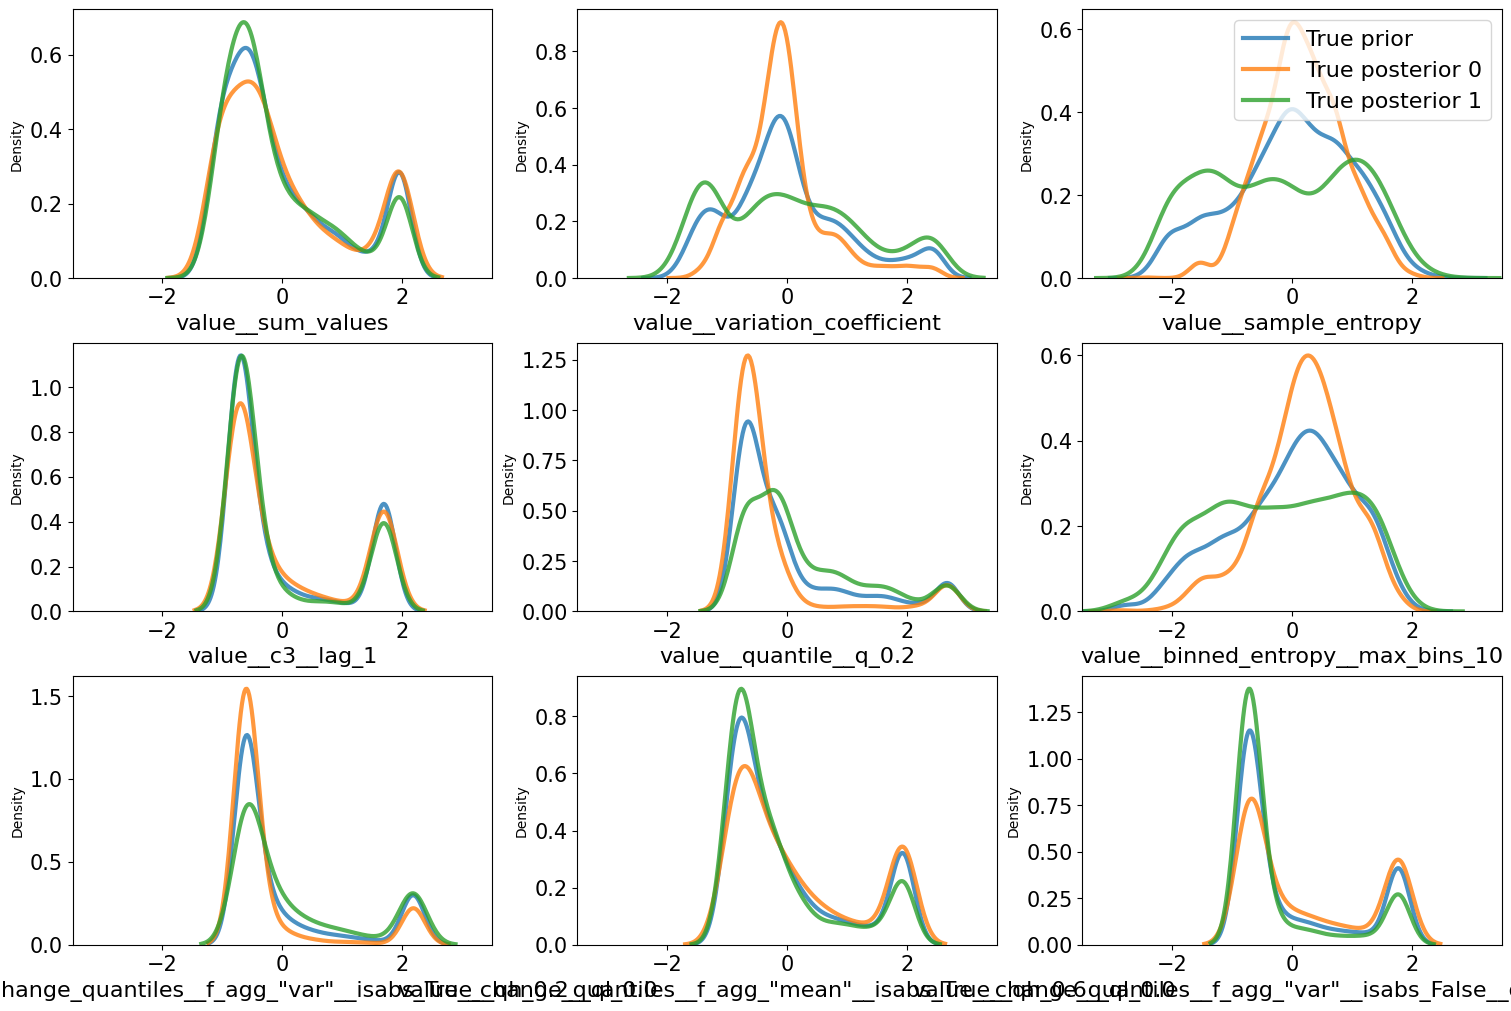

In [ ]:
# Set up the plot layout
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Define the indices of the attributes to be plotted
attribute_indices = [0, 2, 4, 6, 8, 11, 14, 17, 20]
selected_predictor_columns = [predictor_columns[idx] for idx in attribute_indices]

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 0], x=col_name, ax=axes[row, col], label='True posterior 0', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 1], x=col_name, ax=axes[row, col], label='True posterior 1', linewidth=3, alpha=0.8)

    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Add vertical lines at the mean of each attribute
    #axes[row, col].axvline(predictor_info[i]['mean'], linestyle='--', color='black', label='Mean')
    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

#plt.suptitle('KDE Plots of Predictor Attributes (Normalized)', fontsize=20)
plt.show()

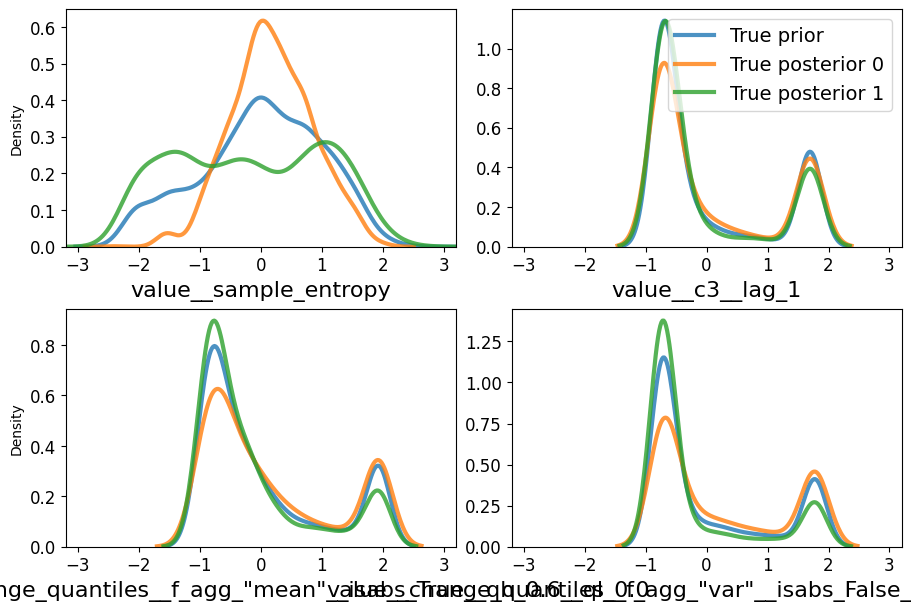

In [ ]:
# Set up the plot layout
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(9, 6), constrained_layout=True)

# Define the indices of the attributes to be plotted
paper_attribute_indices = [4, 6, 17, 20]
paper_selected_predictor_columns = [predictor_columns[idx] for idx in paper_attribute_indices]

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(paper_selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 0], x=col_name, ax=axes[row, col], label='True posterior 0', linewidth=3, alpha=0.8)
    sns.kdeplot(data=X_train[train_df['target'] == 1], x=col_name, ax=axes[row, col], label='True posterior 1', linewidth=3, alpha=0.8)

    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=12)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    if col==1:
        axes[row, col].set(ylabel='')

    # Add vertical lines at the mean of each attribute
    axes[row, col].set_xlim(-3.2, 3.2)
    if i==1:
        axes[row, col].legend(fontsize=14)

#plt.suptitle('KDE Plots of Predictor Attributes (Normalized)', fontsize=20)
plt.show()

In [ ]:
# Set up the plot layout

prior_KLDs = []

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):


    # Plot uniform prior distribution
    true_prior_x = predictor_info[i]['pdf'](x)

    KLD_value = entropy(true_prior_x, uniform_prior_x)
    prior_KLDs.append(KLD_value)

prior_KLDs = np.array(prior_KLDs)

In [ ]:
# Get the indices that would sort the KLD values in descending order
prior_KLDs_sorted_indices = np.argsort(prior_KLDs)

# Display the indices order associated with descending order of KLD values
print("Indices order associated with descending order of KLD values:")
print(prior_KLDs_sorted_indices)

Indices order associated with descending order of KLD values:
[ 4 11  2 25 24  3 21  0 23 29  1 17 28 10 26  9 19 13  8 22  5  7 27 18
 20 16  6 15 14 12]


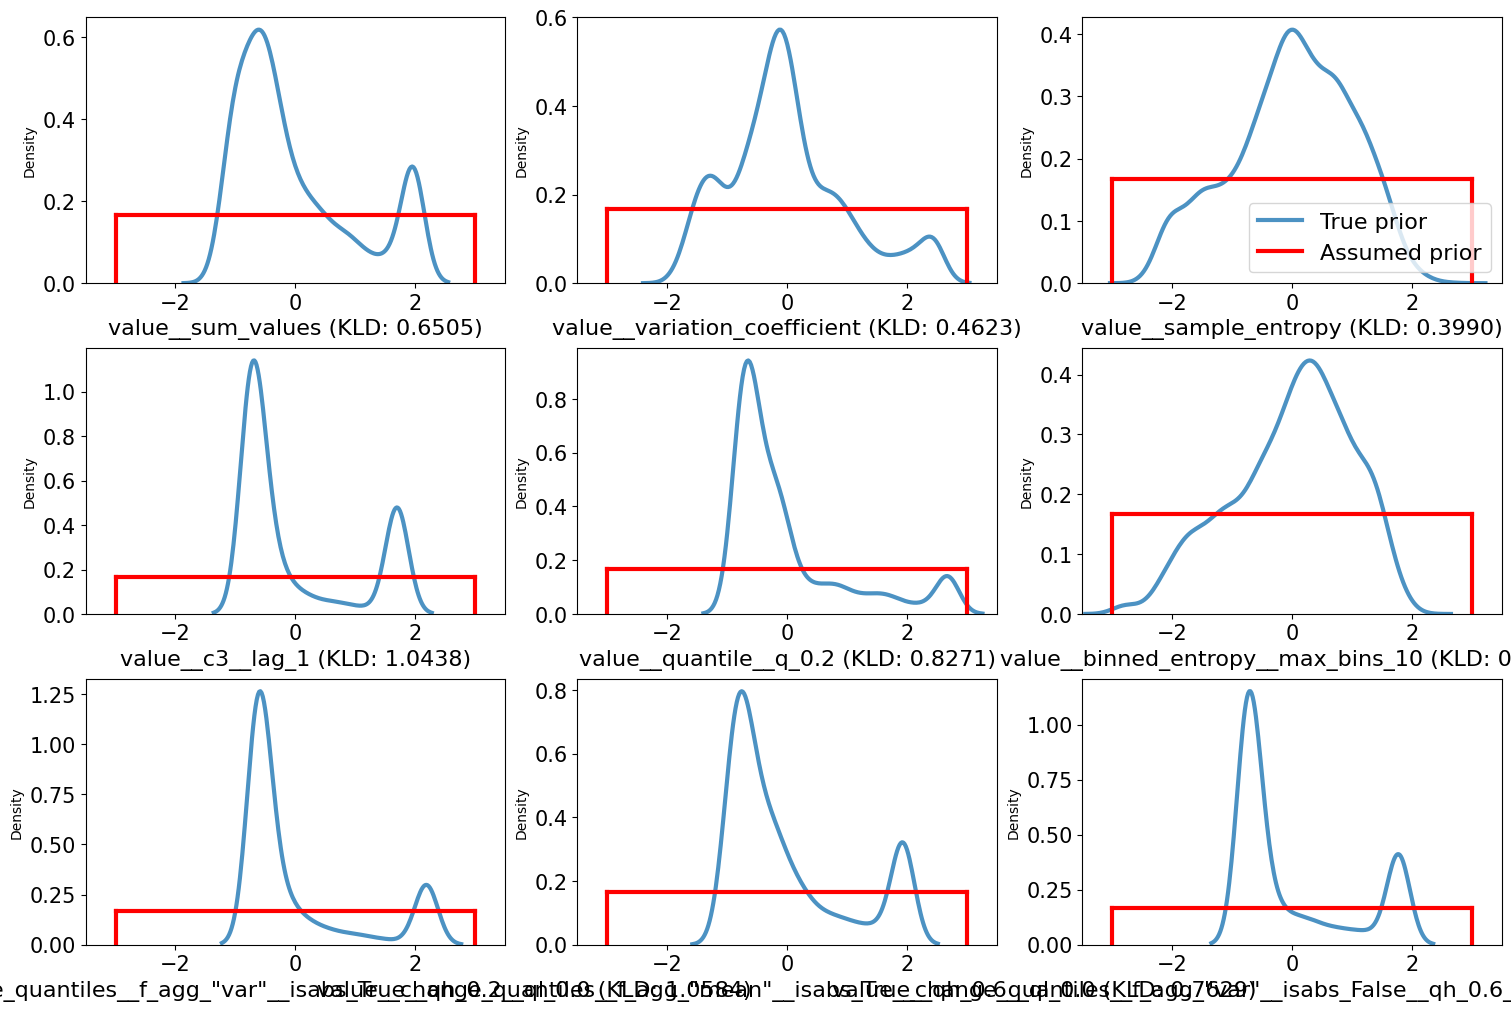

In [ ]:
# Set up the plot layout
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)

    # Plot uniform prior distribution
    uniform_height = 1 / 6
    uniform_x = np.linspace(-3,3,100)
    uniform_y = np.full_like(uniform_x, uniform_height)
    axes[row, col].plot(uniform_x, uniform_y, label='Assumed prior', color='red', linewidth=3)

    max_uniform_y = uniform_height / axes[row, col].get_ylim()[1]

    # Add vertical lines on the left and right ends of the uniform distribution
    axes[row, col].axvline(x=-3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)
    axes[row, col].axvline(x=3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)


    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=15)
    axes[row, col].set_xlabel(col_name, fontsize=16)

    # Display JSD value and attribute name as the title
    axes[row, col].set_xlabel(f'{col_name} (KLD: {prior_KLDs[attribute_indices[i]]:.4f})', fontsize=16)
    #axes[row, col].set_xlabel(col_name, fontsize=16)


    axes[row, col].set_xlim(-3.5, 3.5)
    if i==2:
        axes[row, col].legend(fontsize=16)

plt.show()

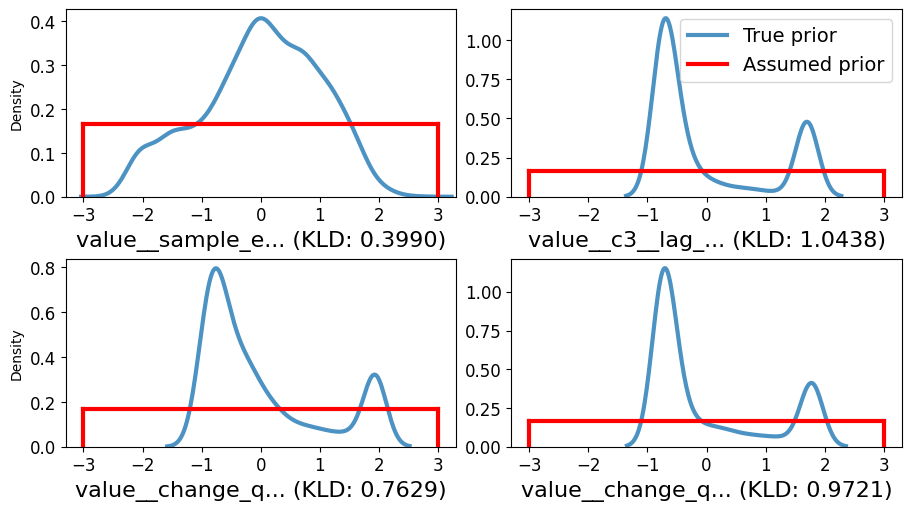

In [ ]:
# Set up the plot layout
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(9, 5), constrained_layout=True)

# Plot the KDEs for each attribute and class
for i, col_name in enumerate(paper_selected_predictor_columns):
    row = i // ncols
    col = i % ncols
    sns.kdeplot(data=X_train, x=col_name, ax=axes[row, col], label='True prior', linewidth=3, alpha=0.8)

    # Plot uniform prior distribution
    uniform_height = 1 / 6
    uniform_x = np.linspace(-3,3,100)
    uniform_y = np.full_like(uniform_x, uniform_height)
    axes[row, col].plot(uniform_x, uniform_y, label='Assumed prior', color='red', linewidth=3)

    max_uniform_y = uniform_height / axes[row, col].get_ylim()[1]

    # Add vertical lines on the left and right ends of the uniform distribution
    axes[row, col].axvline(x=-3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)
    axes[row, col].axvline(x=3, ymin=0, ymax=max_uniform_y, color='red', linewidth=3)


    #axes[row, col].set_title(f'Distribution of {col_name} (Normalized)')
    axes[row, col].tick_params(axis='both', labelsize=12)


    # Display JSD value and attribute name as the title
    axes[row, col].set_xlabel(f'{col_name[:15]}... (KLD: {prior_KLDs[paper_attribute_indices[i]]:.4f})', fontsize=16)

    if col==1:
        axes[row, col].set(ylabel='')

    axes[row, col].set_xlim(-3.3, 3.3)
    if i==1:
        axes[row, col].legend(fontsize=14)

plt.show()

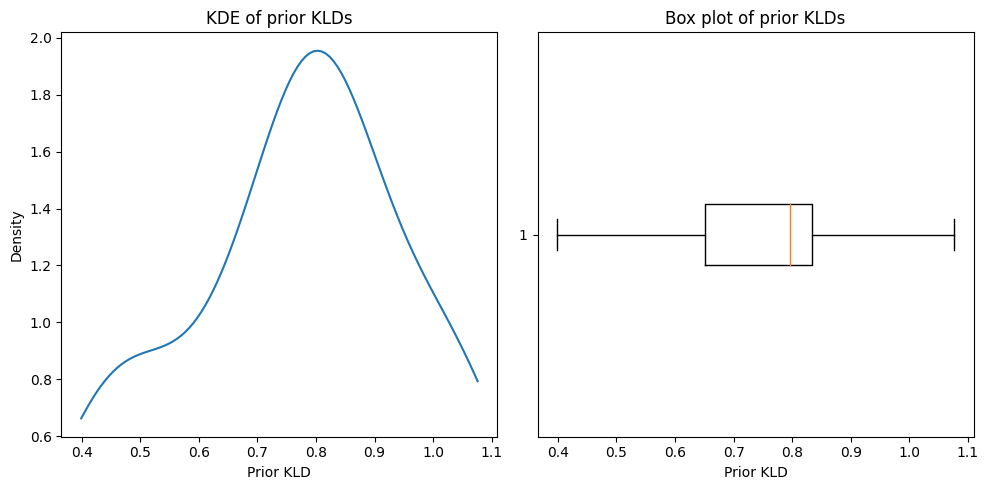

In [ ]:
# Create a figure with subplots for KDE and box plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot KDE of prior KLDs
kde = gaussian_kde(prior_KLDs)
y = np.linspace(min(prior_KLDs), max(prior_KLDs), 100)
ax1.plot(y, kde(y))
ax1.set_xlabel('Prior KLD')
ax1.set_ylabel('Density')
ax1.set_title('KDE of prior KLDs')

# Plot box plot of prior KLDs
ax2.boxplot(prior_KLDs, vert=False)
ax2.set_xlabel('Prior KLD')
ax2.set_title('Box plot of prior KLDs')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, entropy, gaussian_kde


def proposal_within_range(current_params, scale):
    proposed_params = current_params + np.random.normal(0, scale, len(current_params))

    while not np.all(np.logical_and(-3 <= proposed_params, proposed_params <= 3)):
        idx_outside_range = np.where(np.logical_or(proposed_params < -3, proposed_params > 3))[0]
        proposed_params[idx_outside_range] = current_params[idx_outside_range] + np.random.normal(0, scale, len(idx_outside_range))

    return proposed_params



# Log Prior distribution
def log_uniform_prior(params):
    log_joint_probability = 0

    for i, param in enumerate(params):
        log_joint_probability += np.log(1/6)

    return log_joint_probability



# Likelihood function
def log_likelihood(params, data):
    feature_values = {col_name: [value] for col_name, value in zip(column_index_map.values(), params)}
    X_new = pd.DataFrame(feature_values)

    if data == 1:
        return np.log(ml.predict_proba(X_new)[0, 1])
    else:
        return np.log(1 - ml.predict_proba(X_new)[0, 1])



# Metropolis-Hastings MCMC algorithm
def metropolis_hastings(num_samples, initial_params, data):
    np.random.seed(42)

    current_params = initial_params
    accepted_params = [[] for _ in range(len(initial_params))]

    current_log_posterior = log_uniform_prior(current_params) + log_likelihood(current_params, data)

    iter = 0
    num_accepted = 0

    while num_accepted < num_samples:
        # Generate proposed params until likelihood >= 0.8
        proposed_params = np.zeros_like(current_params)
        proposed_likelihood = -np.inf

        iter = iter + 1

        num_proposing = 0
        while proposed_likelihood < np.log(0.5):
            num_proposing = num_proposing + 1
            proposed_params = proposal_within_range(current_params, 1)
            proposed_likelihood = log_likelihood(proposed_params, data)

        # Calculate acceptance probability
        proposed_log_posterior = log_uniform_prior(proposed_params) + proposed_likelihood
        acceptance_probability = np.exp(proposed_log_posterior - current_log_posterior)


        # Accept or reject the proposed parameter
        if np.random.rand() < acceptance_probability:
            num_accepted = num_accepted + 1

            if num_accepted % 1000 == 0:
                print("Num samples accepted: ", num_accepted)

            current_params = proposed_params
            current_log_posterior = proposed_log_posterior
            for i, param in enumerate(current_params):
                accepted_params[i].append(param)

    return accepted_params

In [ ]:
# Configuration settings for running MCMC and saving samples

run_MCMC = True
save_samples = True

data_shifts = [0, -0.2, -0.4, -0.6, -0.8, -1, 0.2, 0.4, 0.6, 0.9, 1]

samples_0_file_name = 'retina_DNN_class_0_samples.pickle'
samples_1_file_name = 'retina_DNN_class_1_samples.pickle'

In [ ]:
class0_samples = []
class1_samples = []

original_training_accuracies = []
original_test_accuracies = []

for shift in data_shifts:

    print('\n\n\nInverse estimation for data with shift ', shift)

    # Shift every value in the DataFrame to the right
    X_train_shifted = X_train.add(shift)


    # Resample the training set using RandomOverSampler to address class imbalance
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train_shifted, y_train)



    print('\nModel evaluation on training set:')

    # Initialize Random Forest classifier

    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_train, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    original_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)



    print('\nModel evaluation on test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    original_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    if run_MCMC:

        # Run MCMC
        num_samples = 5000
        initial_params = np.zeros(num_predictor_columns)

        print('\nMCMC for class 0')
        accepted_params_zero = metropolis_hastings(num_samples, initial_params, 0)
        class0_samples.append(accepted_params_zero)

        print('\nMCMC for class 1')
        accepted_params_one = metropolis_hastings(num_samples, initial_params, 1)
        class1_samples.append(accepted_params_one)

if save_samples:

    # Save the list to a file
    with open(samples_0_file_name, 'wb') as f:
        pickle.dump(class0_samples, f)

    files.download(samples_0_file_name)

    # Save the list to a file
    with open(samples_1_file_name, 'wb') as f:
        pickle.dump(class1_samples, f)

    files.download(samples_1_file_name)

if ~ run_MCMC:
    # Load the list from the file
    with open(samples_0_file_name, 'rb') as f:
        class0_samples = pickle.load(f)

    with open(samples_1_file_name, 'rb') as f:
        class1_samples = pickle.load(f)

original_training_accuracies = np.array(original_training_accuracies)
original_test_accuracies = np.array(original_test_accuracies)





Inverse estimation for data with shift  0

Model evaluation on training set:
Confusion Matrix:
[[1871   30]
 [  95 1806]]
Precision: 0.9836601307189542
Recall: 0.9500263019463441
AUC ROC: 0.9963705804497813
Cohen Kappa Score: 0.9342451341399264
Accuracy: 0.9671225670699631
Geometric Mean Score: 0.966971446039033

Model evaluation on test set:
Confusion Matrix:
[[ 689   56]
 [ 447 2805]]
Precision: 0.9804264243271583
Recall: 0.8625461254612546
AUC ROC: 0.9580322279732865
Cohen Kappa Score: 0.654893809637509
Accuracy: 0.8741556167125344
Geometric Mean Score: 0.8931463729688368

MCMC for class 0
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000

MCMC for class 1
Num samples accepted:  1000
Num samples accepted:  2000
Num samples accepted:  3000
Num samples accepted:  4000
Num samples accepted:  5000



Inverse estimation for data with shift  -0.2

Model evaluation on training set:
Confusion Matrix

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
accepted_params_zero = class0_samples[0]
accepted_params_one = class1_samples[0]

In [ ]:
# Define the est_posterior function with list comprehension
def est_posterior(a, prob, bins):
    return np.array([prob[np.digitize(val, bins) - 1] if (val > np.min(bins)) and (val < np.max(bins) and (prob[np.digitize(val, bins) - 1] != 0)) else 1e-9 for val in a])

In [ ]:
avg_posterior_KLDs = []


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    prob, bins = np.histogram(accepted_params_one[i], bins=100, density=True)
    est_post1 = est_posterior(x, prob, bins)


     # Posterior histogram
    prob, bins = np.histogram(accepted_params_zero[i], bins=100, density=True)
    est_post0 = est_posterior(x, prob, bins)


     # Prior distribution
    true_posterior1_x = predictor_info[i]['pdf1'](x)

    # Prior distribution
    true_posterior0_x = predictor_info[i]['pdf0'](x)

    avg_KLD_value = 0.5*entropy(true_posterior0_x, est_post0) + 0.5*entropy(true_posterior1_x, est_post1)
    avg_posterior_KLDs.append(avg_KLD_value)


avg_posterior_KLDs = np.array(avg_posterior_KLDs)

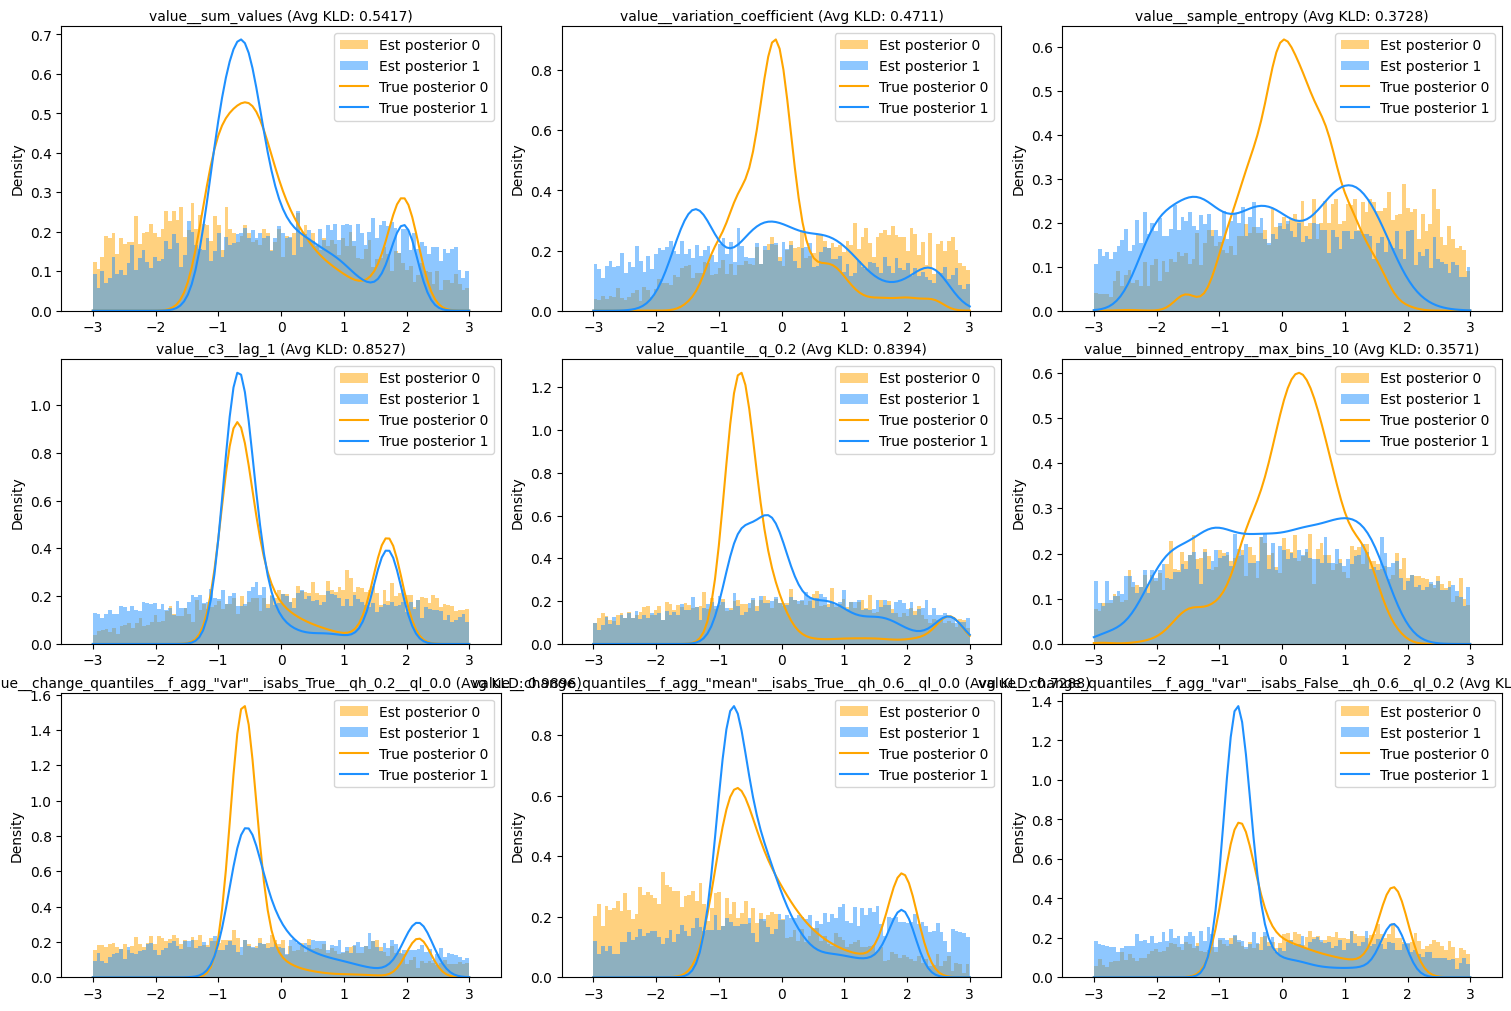

In [ ]:
# Set up the plot layout
nrows = 3
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 10), constrained_layout=True)


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(selected_predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    post0, bins0, _ = axes[row, col].hist(accepted_params_zero[attribute_indices[i]], bins=100, density=True, alpha=0.5, label='Est posterior 0', color='orange')
    post1, bins1, _ = axes[row, col].hist(accepted_params_one[attribute_indices[i]], bins=100, density=True, alpha=0.5, label='Est posterior 1', color='dodgerblue')

    # Prior distribution
    posterior0_x = predictor_info[attribute_indices[i]]['pdf0'](x)
    axes[row, col].plot(x, posterior0_x, label='True posterior 0', color='orange')

     # Prior distribution
    posterior1_x = predictor_info[attribute_indices[i]]['pdf1'](x)
    axes[row, col].plot(x, posterior1_x, label='True posterior 1', color='dodgerblue')

    axes[row, col].xaxis.set_label_position('top')
    axes[row, col].set_xlim(-3.5, 3.5)
    axes[row, col].set_xlabel(f'{col_name} (Avg KLD: {avg_posterior_KLDs[attribute_indices[i]]:.4f})')
    axes[row, col].set_ylabel('Density')
    axes[row, col].legend()

plt.show()

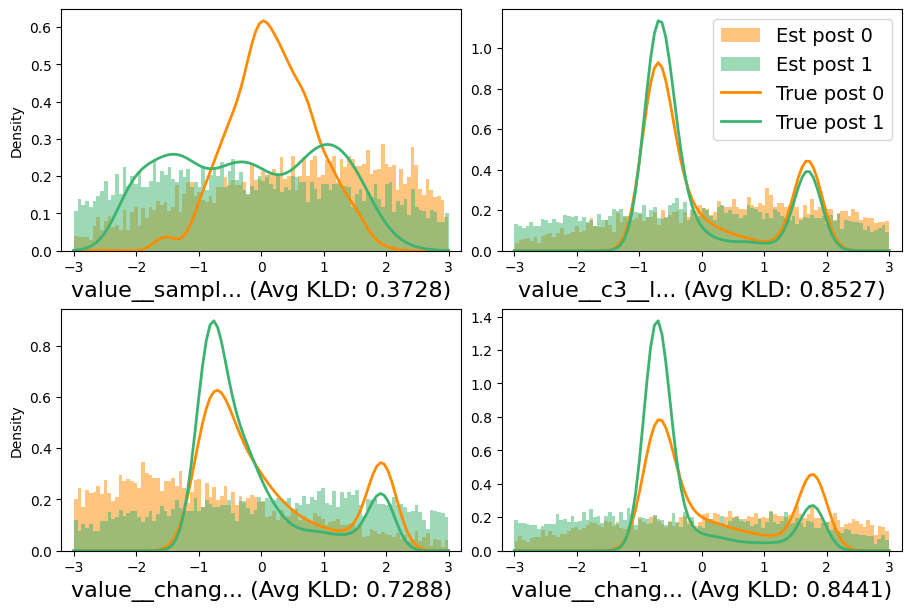

In [ ]:
# Set up the plot layout
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows, ncols, figsize=(9, 6), constrained_layout=True)


# Plot the KDEs for each attribute and class
for i, col_name in enumerate(paper_selected_predictor_columns):
    row = i // ncols
    col = i % ncols

    # Posterior histogram
    post0, bins0, _ = axes[row, col].hist(accepted_params_zero[paper_attribute_indices[i]], bins=100, density=True, alpha=0.5, label='Est post 0', color='darkorange')
    post1, bins1, _ = axes[row, col].hist(accepted_params_one[paper_attribute_indices[i]], bins=100, density=True, alpha=0.5, label='Est post 1', color='mediumseagreen')

    # Prior distribution
    posterior0_x = predictor_info[paper_attribute_indices[i]]['pdf0'](x)
    axes[row, col].plot(x, posterior0_x, label='True post 0', color='darkorange', linewidth=2)

     # Prior distribution
    posterior1_x = predictor_info[paper_attribute_indices[i]]['pdf1'](x)
    axes[row, col].plot(x, posterior1_x, label='True post 1', color='mediumseagreen', linewidth=2)

    axes[row, col].set_xlabel(f'{col_name[:12]}... (Avg KLD: {avg_posterior_KLDs[paper_attribute_indices[i]]:.4f})', fontsize=16)


    axes[row, col].xaxis.set_label_position('bottom')
    axes[row, col].set_xlim(-3.2, 3.2)
    #axes[row, col].set_xlabel(f'{col_name} (Avg KLD: {avg_posterior_KLDs[paper_attribute_indices[i]]:.4f})')
    axes[row, col].set_ylabel('Density')

    if col==1:
        axes[row, col].set(ylabel='')

    if i==1:
        axes[row, col].legend(fontsize=14)

plt.show()

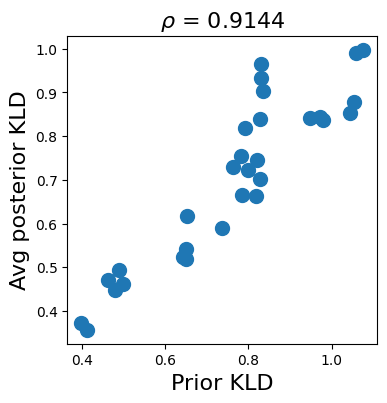

In [ ]:
avg_post_KLDs_all_params = []

for i, shift in enumerate(data_shifts):

    #print('\n\n\nPrior JSD vs  Avg posterior KLD for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)


    avg_posterior_KLDs = []


    # Plot the KDEs for each attribute and class
    for j, col_name in enumerate(predictor_columns):
        row = j // ncols
        col = j % ncols

        # Posterior histogram
        prob, bins = np.histogram(accepted_params_one[j], bins=100, density=True)
        est_post1 = est_posterior(x, prob, bins)


        # Posterior histogram
        prob, bins = np.histogram(accepted_params_zero[j], bins=100, density=True)
        est_post0 = est_posterior(x, prob, bins)


        # Prior distribution
        true_posterior1_x = predictor_info[j]['pdf1'](x)

        # Prior distribution
        true_posterior0_x = predictor_info[j]['pdf0'](x)

        avg_KLD_value = 0.5*entropy(true_posterior0_x, est_post0) + 0.5*entropy(true_posterior1_x, est_post1)
        avg_posterior_KLDs.append(avg_KLD_value)


    avg_posterior_KLDs = np.array(avg_posterior_KLDs)
    avg_post_KLDs_all_params.append(np.mean(avg_posterior_KLDs))


    if shift==0:
        plt.figure(figsize=(4, 4))

        # Create a scatter plot of the two sets of importance values
        plt.scatter(prior_KLDs, avg_posterior_KLDs, s=100)


        # Calculate the correlation coefficient between the two sets of importance values
        correlation_coefficient = np.corrcoef(prior_KLDs, avg_posterior_KLDs)[0, 1]

        # Set the axis labels and title
        plt.xlabel('Prior KLD', fontsize=16)
        plt.ylabel('Avg posterior KLD', fontsize=16)
        plt.title('$\\rho$ = {:.4f}'.format(correlation_coefficient), fontsize=16)

        # Display the plot
        plt.show()

avg_post_KLDs_all_params = np.array(avg_post_KLDs_all_params)


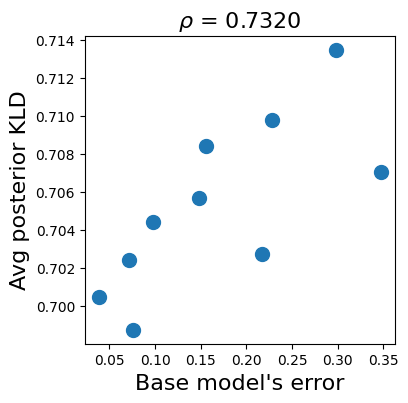

In [ ]:
plt.figure(figsize=(4, 4))

# Create a scatter plot of the two sets of importance values
plt.scatter(1-original_training_accuracies[1:], avg_post_KLDs_all_params[1:], s=100)


# Calculate the correlation coefficient between the two sets of importance values
training_correlation_coefficient = np.corrcoef(1-original_training_accuracies[1:], avg_post_KLDs_all_params[1:])[0, 1]

# Set the axis labels and title
plt.xlabel('Base model\'s error', fontsize=16)
plt.ylabel('Avg posterior KLD', fontsize=16)
plt.title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Display the plot
plt.show()


In [ ]:
synthetic_training_accuracies = []
synthetic_test_accuracies = []

for i, shift in enumerate(data_shifts):

    print('\n\n\nSynthetic models for data with shift ', shift)

    accepted_params_zero = class0_samples[i]
    accepted_params_one = class1_samples[i]

    # Convert the lists to numpy arrays
    accepted_params_zero = np.array(accepted_params_zero)
    accepted_params_one = np.array(accepted_params_one)

    # Concatenate accepted_params_one and accepted_params_zero along the rows axis
    simulated_dataset = np.concatenate((accepted_params_one, accepted_params_zero), axis=1)

    # Transpose the dataset to have 2000 records and 15 predictor attributes
    simulated_dataset = simulated_dataset.T

    # Create an array of class labels (1 for class 1 and 0 for class 0)
    class_labels = np.concatenate((np.ones(accepted_params_one.shape[1]), np.zeros(accepted_params_zero.shape[1])))

    # Add the class labels as the 16th attribute
    simulated_dataset = np.column_stack((simulated_dataset, class_labels))

    data_columns = [col for col in train_df.columns]

    # Convert binary_dataset to a DataFrame
    simulated_train_df = pd.DataFrame(simulated_dataset)

    # Rename the columns of simulated_train_df to match train_df
    simulated_train_df.columns = train_df.columns

    # Check the first few rows of simulated_train_df
    simulated_train_df

    # Separate target variable from features
    sim_train_y = simulated_train_df["target"]
    sim_train_X = simulated_train_df.drop("target", axis=1)

    print('\nSynthetic model evaluation on original training set:')

    # Initialize Random Forest classifier
    ml = MLPClassifier(hidden_layer_sizes=(64, 64, 64), max_iter=1000, random_state=42)

    ml.fit(sim_train_X, sim_train_y)

    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_train)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_train)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_train, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_train, y_pred)
    gmean = geometric_mean_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_train, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_train, y_pred)
    synthetic_training_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


    print('\nSynthetic model evaluation on original test set:')
    # Predict probabilities for test set
    y_pred_proba = ml.predict_proba(X_test)[:, 1]

    # Predict labels for test set
    y_pred = ml.predict(X_test)

    # Calculate evaluation metrics
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)
    gmean = geometric_mean_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    # Print confusion matrix
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)

    # Print evaluation metrics
    print('AUC ROC:', auc_roc)
    print('Cohen Kappa Score:', cohen_kappa)
    accuracy = accuracy_score(y_test, y_pred)
    synthetic_test_accuracies.append(accuracy)
    print("Accuracy:", accuracy)
    print('Geometric Mean Score:', gmean)


synthetic_training_accuracies = np.array(synthetic_training_accuracies)
synthetic_test_accuracies = np.array(synthetic_test_accuracies)




Synthetic models for data with shift  0

Synthetic model evaluation on original training set:
Confusion Matrix:
[[1663  238]
 [ 180 1721]]
Precision: 0.8785094435936702
Recall: 0.9053129931614939
AUC ROC: 0.9543746321394011
Cohen Kappa Score: 0.7801157285639138
Accuracy: 0.8900578642819569
Geometric Mean Score: 0.8899271221920518

Synthetic model evaluation on original test set:
Confusion Matrix:
[[ 652   93]
 [ 466 2786]]
Precision: 0.9676971170545329
Recall: 0.8567035670356704
AUC ROC: 0.9099028372834064
Cohen Kappa Score: 0.6134784488298861
Accuracy: 0.8601451088316238
Geometric Mean Score: 0.8658864610129008



Synthetic models for data with shift  -0.2

Synthetic model evaluation on original training set:
Confusion Matrix:
[[1642  259]
 [ 172 1729]]
Precision: 0.8697183098591549
Recall: 0.9095213045765387
AUC ROC: 0.94705353172463
Cohen Kappa Score: 0.7732772225144661
Accuracy: 0.8866386112572331
Geometric Mean Score: 0.8863432796149635

Synthetic model evaluation on original t

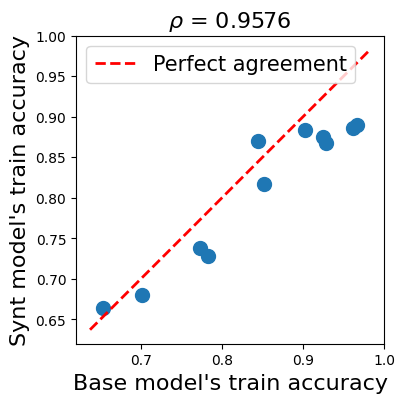

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the training accuracy values
ax.scatter(original_training_accuracies[:], synthetic_training_accuracies[:], s=100)

# Calculate the correlation coefficient between the training accuracy values
training_correlation_coefficient = np.corrcoef(original_training_accuracies[:], synthetic_training_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's train accuracy", fontsize=16)
ax.set_ylabel("Synt model's train accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(training_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red', label='Perfect agreement')


# Add a legend to the plot
ax.legend(fontsize=15)

# Display the plot
plt.show()

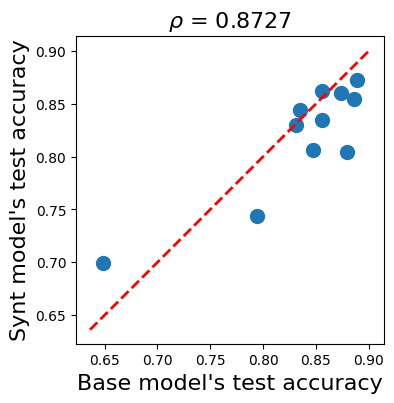

In [ ]:
# Create a figure and set its size
fig, ax = plt.subplots(figsize=(4, 4))

# Create a scatter plot of the test accuracy values
ax.scatter(original_test_accuracies[:], synthetic_test_accuracies[:], s=100)

# Calculate the correlation coefficient between the test accuracy values
test_correlation_coefficient = np.corrcoef(original_test_accuracies[:], synthetic_test_accuracies[:])[0, 1]

# Set the axis labels and title with fontsize
ax.set_xlabel("Base model's test accuracy", fontsize=16)
ax.set_ylabel("Synt model's test accuracy", fontsize=16)
ax.set_title('$\\rho$ = {:.4f}'.format(test_correlation_coefficient), fontsize=16)

# Set equal scaling to force a 45-degree diagonal line
ax.set_aspect('equal', adjustable='box')

# Plot the diagonal line for perfect agreement
lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
ax.plot(lims, lims, linestyle='--', linewidth=2, color='red')


# Display the plot
plt.show()